In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pylab as pl
import xlrd
from io import StringIO
import math
import os
import re


from numba import njit
from numba import  prange
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objects as go

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
dir = 'drive/MyDrive/colab_data/VKR/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
n_rows = 6226
n_point = 16

list_1 =["CIRCLE_Deformable_Model-18439_500_0_15_0.txt",
         "CIRCLE_Deformable_Model-18439_500_0_15_200.txt",
         "CIRCLE_Deformable_Model-18439_500_0_2_0.txt",
         "CIRCLE_Deformable_Model-18439_500_0_2_200.txt",
         "CIRCLE_Deformable_Model-18439_500_0_25_0.txt",
         "CIRCLE_Deformable_Model-18439_500_0_25_200.txt"
    ]
png_name = "Circle_Deformable_500_Friction"
example_dir = 'drive/MyDrive/colab_data/VKR/18439/'
#path = 'drive/MyDrive/colab_data/VKR/18439/'
#example_dir  = r'C:/Users/demin/Projects/Wire_drawing/Nurjanov_Lukin/Data/'
#path= r'C:/Users/demin/Projects/Wire_drawing/Nurjanov_Lukin/Data/'

In [ ]:
def read_data_txt_np(name_of_file,example_dir):
    if os.path.isfile(os.path.join(example_dir, name_of_file)):
        file = os.path.join(example_dir, name_of_file)
        if file.endswith('.txt'):
            data = np.loadtxt(file,dtype='double',skiprows=n_rows)

    return data

In [ ]:
data_0 = np.loadtxt(example_dir+list_1[0],dtype='double',skiprows=n_rows)
data_1 = np.loadtxt(example_dir+list_1[1],dtype='double',skiprows=n_rows)

In [ ]:
file_0=example_dir+list_1[0]
file_1=example_dir+list_1[1]
file_2=example_dir+list_1[2]
file_3=example_dir+list_1[3]
file_4=example_dir+list_1[4]
file_5=example_dir+list_1[5]

In [ ]:
def median_np(x): 
    """ Построение медианы по переданному списку """
    return np.median(x)

In [ ]:
def index_nodes_form_zero_frame(file):
    x= np.loadtxt(file,dtype='double',skiprows=n_rows)[::,1]
    y= np.loadtxt(file,dtype='double',skiprows=n_rows)[::,2]
    index = 0
    index_zero_node = np.zeros((1,1))
    for i in range(0,len(y)):
        if abs(y[i])<=10**(-5): #and x[i]>=0
            index_zero_node[index]=i
            index_zero_node=np.concatenate((index_zero_node,np.zeros((1,1))))
            index = index+1
    return index_zero_node.flatten()

In [ ]:
index = index_nodes_form_zero_frame(file_0)#[0:10]

In [ ]:
def preprocessing_res_np_ver_2 (file,z_index): 
    
    x_1 = (file[::,1])#*10**3
    y_1 = (file[::,2])#*10**3
    z_1 = (file[::,3])#*10**3

    eps_11_name = file[::,10]
    eps_22_name = file[::,11]
    eps_33_name = file[::,12]
    eps_12_name = file[::,13]
    eps_13_name = file[::,14]
    eps_23_name = file[::,15]

    stress_11_name = (file[::,4])#/10**6
    stress_22_name = (file[::,5])#/10**6
    stress_33_name = (file[::,6])#/10**6
    stress_12_name = (file[::,7])#/10**6
    stress_13_name = (file[::,8])#/10**6
    stress_23_name = (file[::,9])#/10**6 

    index = 0
    
    x_1_ = np.zeros((1,1))
    y_1_ = np.zeros((1,1))
    z_1_ = np.zeros((1,1))
    
    s_11 =  np.zeros((1,1))
    s_22 =  np.zeros((1,1))
    s_33 =  np.zeros((1,1))
    s_12 =  np.zeros((1,1))
    s_13 =  np.zeros((1,1))
    s_23 =  np.zeros((1,1))
    s_int =  np.zeros((1,1))
    
    eps_11 =  np.zeros((1,1))
    eps_22 =  np.zeros((1,1))
    eps_33 =  np.zeros((1,1))
    eps_12 =  np.zeros((1,1))
    eps_13 =  np.zeros((1,1))
    eps_23 =  np.zeros((1,1))
    eps_int =  np.zeros((1,1))

    for j in range(0, np.shape(z_1)[0]) :
        if (j in z_index):
            if abs(z_1[j])>= 0.25*(np.max(z_1)-np.min(z_1)) and z_1[j]<=0.75*(np.max(z_1)-np.min(z_1)): 
                x_1_[index]=x_1[j]
                y_1_[index]=y_1[j]
                z_1_[index]=z_1[j]
                #ind_[index] = j

                s_11[index] = stress_11_name[j]
                s_22[index] = stress_22_name[j]
                s_33[index] = stress_33_name[j]
                s_12[index] = stress_12_name[j]
                s_13[index] = stress_13_name[j]
                s_23[index] = stress_23_name[j]
                s_int[index] = (1/(np.sqrt(2)))*np.sqrt((stress_11_name[j]-stress_22_name[j])**2+(stress_22_name[j]-stress_33_name[j])**2+(stress_33_name[j]-stress_11_name[j])**2+6*(stress_12_name[j]**2+stress_13_name[j]**2+stress_23_name[j]**2))

                eps_11[index] = eps_11_name[j]
                eps_22[index] = eps_22_name[j]
                eps_33[index] = eps_33_name[j]
                eps_12[index] = eps_12_name[j]
                eps_13[index] = eps_13_name[j]
                eps_23[index] = eps_23_name[j]
                eps_int[index] = ((np.sqrt(2)/3))*np.sqrt((eps_11_name[j]-eps_22_name[j])**2+(eps_22_name[j]-eps_33_name[j])**2+(eps_33_name[j]-eps_11_name[j])**2+1.5*(eps_12_name[j]**2+eps_13_name[j]**2+eps_23_name[j]**2))


                x_1_=np.concatenate((x_1_,np.zeros((1,1))))
                y_1_=np.concatenate((y_1_,np.zeros((1,1))))
                z_1_=np.concatenate((z_1_,np.zeros((1,1))))
                s_11=np.concatenate((s_11,np.zeros((1,1))))
                s_22=np.concatenate((s_22,np.zeros((1,1))))
                s_33=np.concatenate((s_33,np.zeros((1,1))))
                s_12=np.concatenate((s_12,np.zeros((1,1))))
                s_13=np.concatenate((s_13,np.zeros((1,1))))
                s_23=np.concatenate((s_23,np.zeros((1,1))))
                s_int=np.concatenate((s_int,np.zeros((1,1))))

                eps_11=np.concatenate((eps_11,np.zeros((1,1))))
                eps_22=np.concatenate((eps_22,np.zeros((1,1))))
                eps_33=np.concatenate((eps_33,np.zeros((1,1))))
                eps_12=np.concatenate((eps_12,np.zeros((1,1))))
                eps_13=np.concatenate((eps_13,np.zeros((1,1))))
                eps_23=np.concatenate((eps_23,np.zeros((1,1))))
                eps_int=np.concatenate((eps_int,np.zeros((1,1))))

                #Stress= np.concatenate((Stress,np.zeros((1,7))))
                #Strain= np.concatenate((Strain,np.zeros((1,7))))

                index = index+1

    res_0 = np.hstack((x_1_,y_1_,z_1_,s_11,s_22,s_33,s_12,s_13,s_23,s_int,eps_11,eps_22,eps_33,eps_12,eps_13,eps_23,eps_int))
    #i = np.where(res_0[::,0]==0)
    #res = np.zeros((1,len(x_1_)-1))
    #res = np.delete(res_0[::,0],i)
    res_1 = np.array(sorted(res_0, key=lambda x: x[0]))
    return  res_1

In [ ]:
z_index_500 = index_nodes_form_zero_frame(file_0)
file_test_500 =np.loadtxt(file_1,dtype='double',skiprows=n_rows)

z_index_750 = index_nodes_form_zero_frame(file_2)
file_test_750 =np.loadtxt(file_3,dtype='double',skiprows=n_rows) 

z_index_1000 = index_nodes_form_zero_frame(file_4)
file_test_1000 =np.loadtxt(file_5,dtype='double',skiprows=n_rows) 

In [ ]:
res_500 = preprocessing_res_np_ver_2(file_test_500,z_index_500)

res_750 = preprocessing_res_np_ver_2(file_test_750,z_index_750)

res_1000 = preprocessing_res_np_ver_2(file_test_1000,z_index_1000)

In [ ]:
def average_val_np(array_1,n_bins):
    """ Построение осредненных распределений """
    b=np.zeros((n_bins))
    for i in range(0,n_bins):
        b[i]=np.median(np.array_split(array_1,n_bins)[i])

    return b

In [ ]:
%%time
x_0_500 = average_val_np(res_500[::,0],n_point)
s_int_500 = average_val_np(res_500[::,9],n_point) 
s_int_500 = average_val_np(res_500[::,4],n_point)

x_0_750 = average_val_np(res_750[::,0],n_point)
s_int_750 = average_val_np(res_750[::,9],n_point) 
s_int_750 = average_val_np(res_750[::,4],n_point) 

x_0_1000 = average_val_np(res_1000[::,0],n_point)
s_int_1000 = average_val_np(res_1000[::,9],n_point) 
s_int_1000 = average_val_np(res_1000[::,4],n_point) 

CPU times: user 20.4 ms, sys: 0 ns, total: 20.4 ms
Wall time: 20.9 ms


<ipython-input-1442-20fd99b4f99d>:18: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



<Figure size 3000x1400 with 0 Axes>

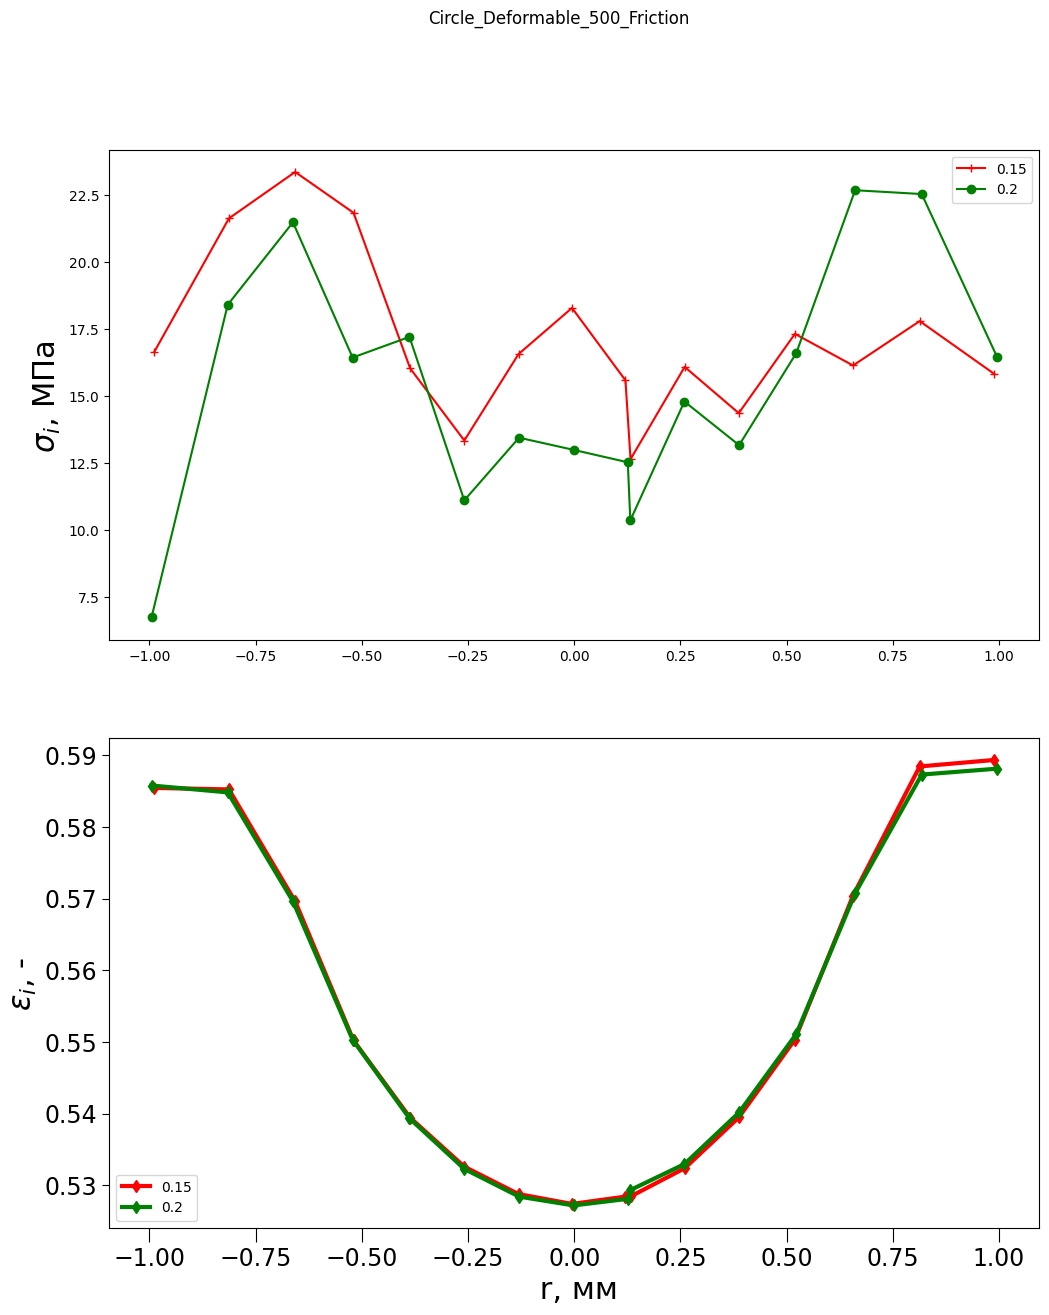

In [ ]:
plt.figure(figsize=(30, 14))
plt.subplots(figsize=(12, 14))

x_0_500 = average_val_np(res_500[::,0],n_point)
x_0_750 = average_val_np(res_750[::,0],n_point)
x_0_1000 = average_val_np(res_1000[::,0],n_point)
#s_int_0 = average_val_np(res_0[::,9],n_point)
#eps_int_0 = average_val_np(res_0[::,-1],n_point)

s_33_500 = abs(average_val_np(res_500[::,9],n_point))
s_33_750 = abs(average_val_np(res_750[::,9],n_point))
s_33_1000 = abs(average_val_np(res_1000[::,9],n_point))

eps_33_500 = (average_val_np(res_500[::,-1],n_point))
eps_33_750 = (average_val_np(res_750[::,-1],n_point))
eps_33_1000 = (average_val_np(res_1000[::,-1],n_point))

plt.subplot(2,1,1)
plt.plot((x_0_500-(x_0_500.max()+x_0_500.min())/2)/x_0_500.max(),s_33_500,'-+',color = "red",label = '0.15')
plt.plot((x_0_750-(x_0_750.max()+x_0_750.min())/2)/x_0_750.max(),s_33_750,'-o',color = "green",label = '0.2')
#plt.plot((x_0_1000-(x_0_500.max()+x_0_1000.min())/2)/x_0_1000.max(),s_33_1000,'-*',color = "blue",label = '0.25')#,label = r'$\sigma_{i}$ ')
plt.legend()
#s_int_0,'-+',label = r'$\sigma_{i}$ ')
plt.ylabel('$\sigma_{i}$, МПа ', fontsize=22)

plt.subplot(2,1,2)

plt.plot((x_0_500-(x_0_500.max()+x_0_500.min())/2)/x_0_500.max(),eps_33_500,'-d',linewidth=3.0,color = "red",label = '0.15')
plt.plot((x_0_750-(x_0_750.max()+x_0_750.min())/2)/x_0_750.max(),eps_33_750,'-d',linewidth=3.0,color = "green",label = '0.2')
#plt.plot((x_0_1000-(x_0_1000.max()+x_0_1000.min())/2)/x_0_1000.max(),eps_33_1000,'-d',linewidth=3.0,color = "blue",label = '0.25')#eps_int_0,'-d',linewidth=3.0,color = "black",label = r'$\epsilon_{i}$')
plt.legend()
#plt.plot((x_0-(x_0.max()+x_0.min())/2)/x_0.max(),eps_int_0,'-d',linewidth=3.0,color = "black",label = r'$\epsilon_{i}$')
plt.ylabel('$\epsilon_{i}$, - ', fontsize=22)    

plt.tick_params(axis='x',length=10,labelsize = 17,zorder=15)
plt.tick_params(axis='y',length=5,labelsize = 17,zorder=15)
plt.xlabel(' r, мм', fontsize=22) #, fontname='Times New Roman')
plt.suptitle(png_name)
plt.savefig(png_name)
#plt.legend(loc='upper right',bbox_to_anchor=(1.3, 1.35), shadow=False, ncol=1,fontsize=17)
#plt.title("Угол наклона {} , длина калибровочного участка{0.}".format(angle_a,l))